In [1]:
import emocodes as ec
from glob import glob
import pandas as pd
import numpy as np 
import os

ll_dir = '/Users/catcamacho/Library/CloudStorage/Box-Box/CCP/HBN_study/HBN_video_coding/processing/low_level/'
fig_dir = '/Users/catcamacho/Library/CloudStorage/Box-Box/CCP/HBN_study/HBN_video_coding/processing/figures/'
raw_dir = '/Users/catcamacho/Library/CloudStorage/Box-Box/CCP/HBN_study/HBN_video_coding/processing/raw/'
proc_dir = '/Users/catcamacho/Library/CloudStorage/Box-Box/CCP/HBN_study/HBN_video_coding/processing/processed/'
sum_dir = '/Users/catcamacho/Library/CloudStorage/Box-Box/CCP/HBN_study/HBN_video_coding/processing/summary/'

/Users/catcamacho/Library/Python/3.8/lib/python/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


### extract low-level features

In [ ]:
opt = pd.read_csv(ll_dir + 'OLD/movieDM_opticalflow.csv',index_col=0)
opt.index = pd.to_datetime(opt['onset'], unit='s')
opt10 = opt.resample('100ms').mean()
opt10.index = np.arange(0, 600, 0.1)
opt10.to_csv(ll_dir + 'OLD/movieDM_opticalflow10hz.csv')

opt = pd.read_csv(ll_dir + 'OLD/movieTP_opticalflow.csv',index_col=0)
opt.index = pd.to_datetime(opt['onset'], unit='s')
opt10 = opt.resample('100ms').mean()
opt10.index = np.arange(0, 202.5, 0.1)
opt10.to_csv(ll_dir + 'OLD/movieTP_opticalflow10hz.csv')

In [38]:
tp = '/Users/catcamacho/Library/CloudStorage/Box-Box/CCP/HBN_study/HBN_video_coding/Videos/The_Present_0321.mp4'
dm = '/Users/catcamacho/Library/CloudStorage/Box-Box/CCP/HBN_study/HBN_video_coding/Videos/Despicable_Me_1000.mp4'

dm_df10 = ec.ExtractVideoFeatures().extract_features(dm, 10, ll_dir + 'DM_10hz')
dm_df10.combined_df = dm_df10.visual_features_df.merge(dm_df10.audio_features_df, how='left', left_index=True, right_index=True)
dm_df10.combined_df.to_csv(ll_dir + 'DM_10hz.csv')

extracting video features...
Extracting brightness...
Extracting saliency...
Extracting sharpness...
Extracting vibrance...
Combining data...
Visual feature extraction complete.
done!
extracting audio features...
Extracting dynamic tempo...
Extracting loudness...
Extracting major music beats...
Aggregating data...
Auditory feature extraction complete.
done!


In [39]:
tp_df10 = ec.ExtractVideoFeatures().extract_features(tp, 10, ll_dir + 'TP_10hz')
tp_df10.visual_features_df.index = tp_df10.audio_features_df.index
tp_df10.combined_df = tp_df10.visual_features_df.merge(tp_df10.audio_features_df, how='left', left_index=True, right_index=True)
tp_df10.combined_df.to_csv(ll_dir + 'TP_10hz.csv')

extracting video features...
Extracting brightness...


Stim: 4860it [06:27, 12.53it/s]


Extracting saliency...


Stim: 4860it [1:32:34,  1.14s/it]


Extracting sharpness...


Stim: 4860it [04:04, 19.85it/s]


Extracting vibrance...


Stim: 4860it [15:13,  5.32it/s]


Combining data...
Visual feature extraction complete.
done!
extracting audio features...
Extracting dynamic tempo...
Extracting loudness...
Extracting major music beats...
Aggregating data...
Auditory feature extraction complete.
done!


### Process manual code files

In [2]:
files = glob(raw_dir + 'ThePresent*.csv')
video = '/Users/catcamacho/Library/CloudStorage/Box-Box/CCP/HBN_study/HBN_video_coding/Videos/The_Present_0321.mp4'

cts = ec.CodeTimeSeries(sampling_rate=10)

for file in files:
    initials = file[-6:-4]
    filepref = os.path.basename(file)[:-7]
    print(initials)
    print(file)
    #cts.proc_codes_file(codes_file=file, video_file=video, save_file_name=proc_dir+'{0}_timeseries_{1}'.format(filepref,initials))
    
files = glob(raw_dir + 'DespicableMe*.csv')
video = '/Users/catcamacho/Library/CloudStorage/Box-Box/CCP/HBN_study/HBN_video_coding/Videos/Despicable_Me_1000.mp4'

cts = ec.CodeTimeSeries(sampling_rate=10)

for file in files:
    initials = file[-6:-4]
    filepref = os.path.basename(file)[:-7]
    print(initials)
    print(file)
    #cts.proc_codes_file(codes_file=file, video_file=video, save_file_name=proc_dir+'{0}_timeseries_{1}'.format(filepref,initials))

DC
/Users/catcamacho/Library/CloudStorage/Box-Box/CCP/HBN_study/HBN_video_coding/processing/raw/ThePresent_subjectivecharacter_Mom_DC.csv
Code time series saved at /Users/catcamacho/Library/CloudStorage/Box-Box/CCP/HBN_study/hbn_analysis/process_videos/ThePresent_subjectivecharacter_Mom_timeseries_DC_20211227.csv
AC
/Users/catcamacho/Library/CloudStorage/Box-Box/CCP/HBN_study/HBN_video_coding/processing/raw/ThePresent_objective_AC.csv
Code time series saved at /Users/catcamacho/Library/CloudStorage/Box-Box/CCP/HBN_study/hbn_analysis/process_videos/ThePresent_objective_timeseries_AC_20211227.csv
LF
/Users/catcamacho/Library/CloudStorage/Box-Box/CCP/HBN_study/HBN_video_coding/processing/raw/ThePresent_subjectivecharacter_Dog_LF.csv
Code time series saved at /Users/catcamacho/Library/CloudStorage/Box-Box/CCP/HBN_study/hbn_analysis/process_videos/ThePresent_subjectivecharacter_Dog_timeseries_LF_20211227.csv
LF
/Users/catcamacho/Library/CloudStorage/Box-Box/CCP/HBN_study/HBN_video_coding/pr

KeyboardInterrupt: 

### check consensus for The Present

In [4]:
tp_obj = glob(proc_dir + 'ThePresent*obj*')
print(tp_obj)

['/Users/catcamacho/Library/CloudStorage/Box-Box/CCP/HBN_study/HBN_video_coding/processing/processed/ThePresent_objective_timeseries_DS_20211227.csv', '/Users/catcamacho/Library/CloudStorage/Box-Box/CCP/HBN_study/HBN_video_coding/processing/processed/ThePresent_objective_timeseries_AC_20211227.csv']


In [3]:
df1 = pd.read_csv(tp_obj[0], index_col=0)
df2 = pd.read_csv(tp_obj[1], index_col=0)
con = ec.Consensus()
con.interrater_consensus([df1,df2], ['aw','ds'])
con.mismatch_segments.to_csv('TP_mismatch.csv')
con.consensus_scores

,RatingsA,RatingsB,ColumnVariable,PercentOverlap
0_0,aw,ds,closeup,81.095755
0_1,aw,ds,collective,100.0
0_2,aw,ds,has_body,98.667325
0_3,aw,ds,has_faces,94.076999
0_4,aw,ds,has_words,99.555775
0_5,aw,ds,num_chars,92.744324
0_6,aw,ds,time_of_day,100.0
0_7,aw,ds,speaking,100.0
0_8,aw,ds,whole_words,100.0


In [5]:
df1 = pd.read_csv(tp_obj[0], index_col=0)
df2 = pd.read_csv(tp_obj[1], index_col=0)
rel = ec.InterraterReliability()
rel.compute_compile_iccs([df1,df2], list_of_raters=['aw','ds'])

rel.iccs

/Users/catcamacho/Library/Python/3.8/lib/python/site-packages/pingouin/reliability.py:312: RuntimeWarning: invalid value encountered in double_scalars
  icc1 = (msb - msw) / (msb + (k - 1) * msw)
/Users/catcamacho/Library/Python/3.8/lib/python/site-packages/pingouin/reliability.py:313: RuntimeWarning: invalid value encountered in double_scalars
  icc2 = (msb - mse) / (msb + (k - 1) * mse + k * (msj - mse) / n)
/Users/catcamacho/Library/Python/3.8/lib/python/site-packages/pingouin/reliability.py:314: RuntimeWarning: invalid value encountered in double_scalars
  icc3 = (msb - mse) / (msb + (k - 1) * mse)
/Users/catcamacho/Library/Python/3.8/lib/python/site-packages/pingouin/reliability.py:315: RuntimeWarning: invalid value encountered in double_scalars
  icc1k = (msb - msw) / msb
/Users/catcamacho/Library/Python/3.8/lib/python/site-packages/pingouin/reliability.py:316: RuntimeWarning: invalid value encountered in double_scalars
  icc2k = (msb - mse) / (msb + (msj - mse) / n)
/Users/catca

ICCs saved at interrater_iccs.csv
            instance_level_ICC instance_level_consistency
closeup               0.562241                   moderate
collective                 NaN                        NaN
has_body              0.935182                  excellent
has_faces             0.824306                       good
has_words             0.980988                  excellent
num_chars             0.899861                       good
time_of_day                NaN                        NaN
speaking                   1.0                  excellent
whole_words                1.0                  excellent


,instance_level_ICC,instance_level_consistency
closeup,0.562241,moderate
collective,NaN,NaN
has_body,0.935182,excellent
has_faces,0.824306,good
has_words,0.980988,excellent
num_chars,0.899861,good
time_of_day,NaN,NaN
speaking,1.0,excellent
whole_words,1.0,excellent


In [11]:
subchar = glob(proc_dir + 'ThePresent*subjectivechar*')
char, suf = zip(*(s.split("_timeseries_") for s in subchar))
chars = list(np.unique(char))
for c in chars:
    print(c)
    t = glob(c + '*')
    df1 = pd.read_csv(t[0], index_col=0)
    df2 = pd.read_csv(t[1], index_col=0)
    con = ec.Consensus()
    con.interrater_consensus([df1,df2], ['lf','ds'])
    #rel = ec.InterraterReliability()
    #rel.compute_compile_iccs([df1,df2], list_of_raters=['aw','ds'])
    print(con.consensus_scores)

/Users/catcamacho/Library/CloudStorage/Box-Box/CCP/HBN_study/HBN_video_coding/processing/processed/ThePresent_subjectivecharacter_Boy
     RatingsA RatingsB         ColumnVariable PercentOverlap
0_0        lf       ds           c_anger_body      95.409674
0_1        lf       ds           c_anger_face      93.435341
0_2        lf       ds         c_anger_verbal      94.471866
0_3        lf       ds          c_excite_body      98.321816
0_4        lf       ds          c_excite_face        98.8154
0_5        lf       ds        c_excite_verbal      98.914116
0_6        lf       ds            c_fear_body          100.0
0_7        lf       ds            c_fear_face          100.0
0_8        lf       ds          c_fear_verbal          100.0
0_9        lf       ds           c_happy_body      81.786772
0_10       lf       ds           c_happy_face      95.459033
0_11       lf       ds         c_happy_verbal        97.6308
0_12       lf       ds             c_sad_body          100.0
0_13       l

### Check Consensus for Despicable Me

In [7]:
dm_obj = glob(proc_dir + 'Despicable*obj*')
print(dm_obj)

['/Users/catcamacho/Library/CloudStorage/Box-Box/CCP/HBN_study/HBN_video_coding/processing/processed/DespicableMe_objective_timeseries_DS_20211227.csv', '/Users/catcamacho/Library/CloudStorage/Box-Box/CCP/HBN_study/HBN_video_coding/processing/processed/DespicableMe_objective_timeseries_AC_20211227.csv']


In [8]:
df1 = pd.read_csv(dm_obj[0], index_col=0)
df2 = pd.read_csv(dm_obj[1], index_col=0)
rel = ec.InterraterReliability()
rel.compute_compile_iccs([df1,df2], list_of_raters=['aw','ds'])

rel.iccs

/Users/catcamacho/Library/Python/3.8/lib/python/site-packages/pingouin/parametric.py:981: RuntimeWarning: divide by zero encountered in double_scalars
  fval = msbetween / mserror
/Users/catcamacho/Library/Python/3.8/lib/python/site-packages/pingouin/reliability.py:320: RuntimeWarning: divide by zero encountered in double_scalars
  f1k = msb / msw
/Users/catcamacho/Library/Python/3.8/lib/python/site-packages/pingouin/reliability.py:325: RuntimeWarning: divide by zero encountered in double_scalars
  f2k = f3k = msb / mse
/Users/catcamacho/Library/Python/3.8/lib/python/site-packages/pingouin/reliability.py:349: RuntimeWarning: invalid value encountered in double_scalars
  l1 = (f1l - 1) / (f1l + (k - 1))
/Users/catcamacho/Library/Python/3.8/lib/python/site-packages/pingouin/reliability.py:350: RuntimeWarning: invalid value encountered in double_scalars
  u1 = (f1u - 1) / (f1u + (k - 1))
/Users/catcamacho/Library/Python/3.8/lib/python/site-packages/pingouin/reliability.py:353: RuntimeWarn

ICCs saved at interrater_iccs.csv
            instance_level_ICC instance_level_consistency
closeup               0.771866                       good
collective            0.531444                   moderate
has_body              0.713912                   moderate
has_faces              0.88098                       good
has_words             0.629183                   moderate
num_chars             0.896241                       good
time_of_day           0.540805                   moderate
speaking                   1.0                  excellent
whole_words                1.0                  excellent


,instance_level_ICC,instance_level_consistency
closeup,0.771866,good
collective,0.531444,moderate
has_body,0.713912,moderate
has_faces,0.88098,good
has_words,0.629183,moderate
num_chars,0.896241,good
time_of_day,0.540805,moderate
speaking,1.0,excellent
whole_words,1.0,excellent


In [5]:
df1 = pd.read_csv(dm_obj[0], index_col=0)
df2 = pd.read_csv(dm_obj[1], index_col=0)
con = ec.Consensus()
con.interrater_consensus([df1,df2], ['ds','aw'])
con.consensus_scores

,RatingsA,RatingsB,ColumnVariable,PercentOverlap
0_0,ds,aw,closeup,91.568072
0_1,ds,aw,collective,95.617397
0_2,ds,aw,has_body,95.967339
0_3,ds,aw,has_faces,97.683719
0_4,ds,aw,has_words,87.435427
0_5,ds,aw,num_chars,82.136311
0_6,ds,aw,time_of_day,82.636227
0_7,ds,aw,speaking,99.983336
0_8,ds,aw,whole_words,99.983336


In [6]:
con.mismatch_segments.to_csv('DM_mismatch.csv')

In [10]:
subchar = glob(proc_dir + 'DespicableMe*subjectivechar*')
char, suf = zip(*(s.split("_timeseries_") for s in subchar))
chars = list(np.unique(char))
for c in chars:
    print(c)
    t = glob(c + '*')
    if len(t)>1:
        df1 = pd.read_csv(t[0], index_col=0)
        df2 = pd.read_csv(t[1], index_col=0)
        con = ec.Consensus()
        con.interrater_consensus([df1,df2], ['lf','ds'])
        #rel = ec.InterraterReliability()
        #rel.compute_compile_iccs([df1,df2], list_of_raters=['lf','ds'])
        print(con.consensus_scores)

/Users/catcamacho/Library/CloudStorage/Box-Box/CCP/HBN_study/HBN_video_coding/processing/processed/DespicableMe_subjectivecharacter_Agnes
     RatingsA RatingsB         ColumnVariable PercentOverlap
0_0        lf       ds           c_anger_body      98.833528
0_1        lf       ds           c_anger_face      99.200133
0_2        lf       ds         c_anger_verbal      99.500083
0_3        lf       ds          c_excite_body      99.416764
0_4        lf       ds          c_excite_face      99.300117
0_5        lf       ds        c_excite_verbal      99.083486
0_6        lf       ds            c_fear_body      99.950008
0_7        lf       ds            c_fear_face      99.483419
0_8        lf       ds          c_fear_verbal      99.983336
0_9        lf       ds           c_happy_body      95.134144
0_10       lf       ds           c_happy_face      97.667055
0_11       lf       ds         c_happy_verbal      99.033494
0_12       lf       ds             c_sad_body      96.350608
0_13    

# Plot objective data

### The Present

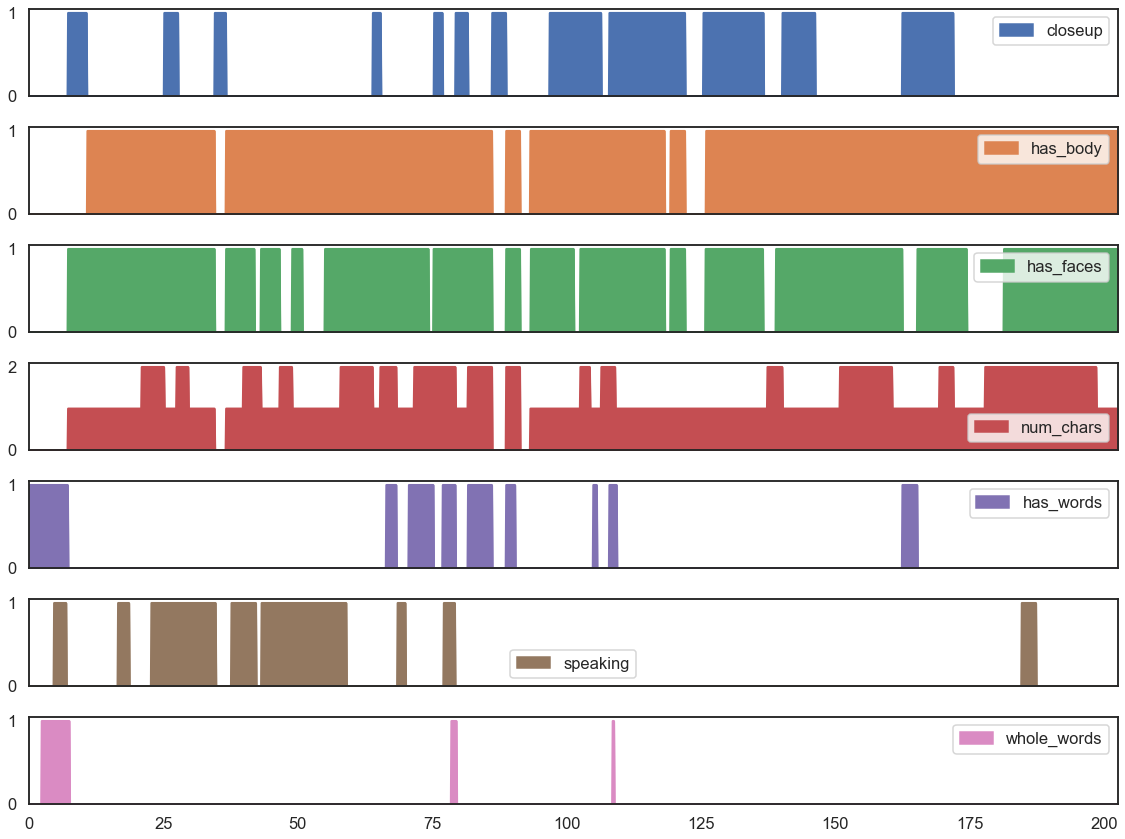

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(context='talk', style='white')

tp_obj = glob(proc_dir + 'ThePresent*obj*')
tp_objcodes = pd.read_csv(tp_obj[0])
tp_objcodes.index = tp_objcodes.index/10
tp_objcodes.plot(subplots=True,figsize=(16,12),y=['closeup','has_body','has_faces','num_chars',
                                                  'has_words','speaking','whole_words'], kind='area',xlim=(0,tp_objcodes.index[-1]))

plt.tight_layout()
#plt.savefig(fig_dir + 'TP_objcodes.svg')
plt.show()
tp_objcodes10hz = tp_objcodes

### Despicable Me

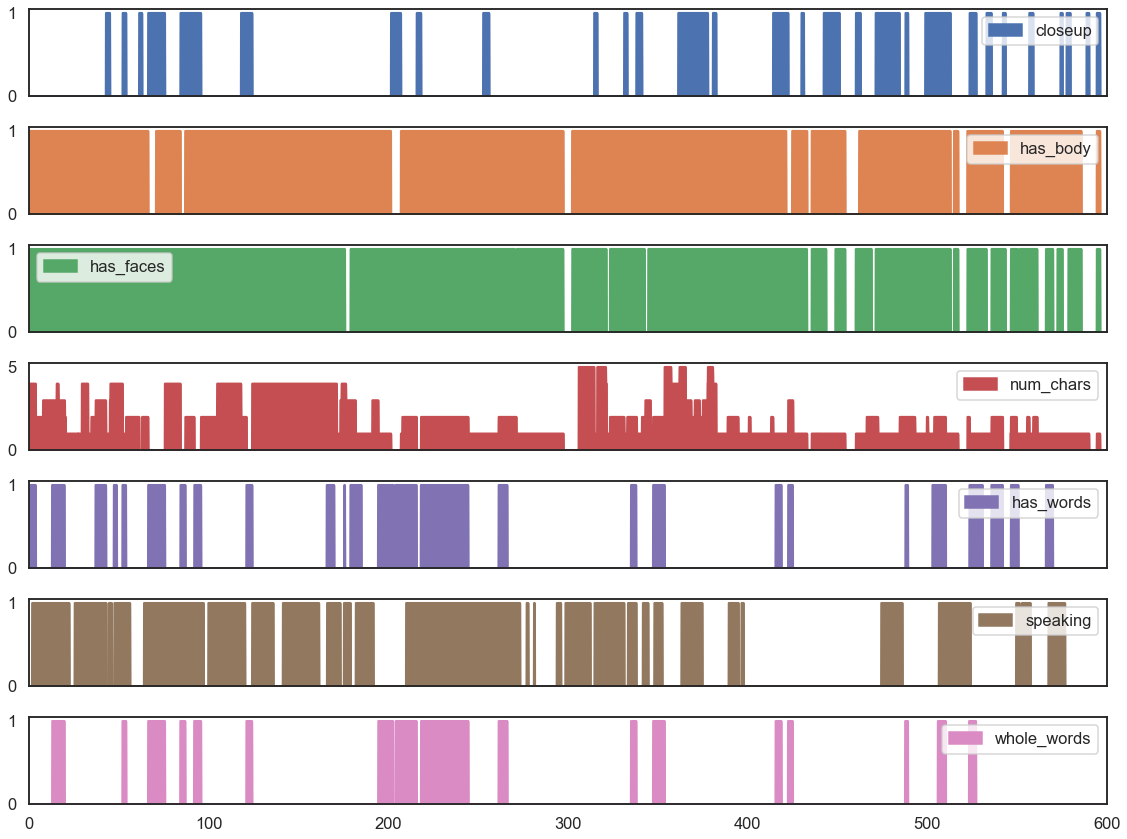

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(context='talk', style='white')

dm_obj = glob(proc_dir + 'Despicable*obj*')
dm_objcodes = pd.read_csv(dm_obj[1])
dm_objcodes.index = dm_objcodes.index/10
dm_objcodes.plot(subplots=True,figsize=(16,12),y=['closeup','has_body','has_faces','num_chars',
                                                  'has_words','speaking','whole_words'], kind='area',xlim=(0,dm_objcodes.index[-1]))

plt.tight_layout()
#plt.savefig(fig_dir + 'DM_objcodes.svg')
plt.show()
dm_objcodes10hz = dm_objcodes

# Process and Plot Subjective Data

### Despicable Me

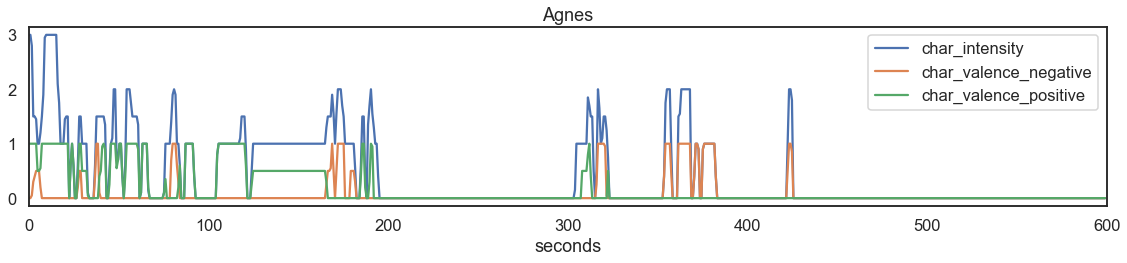

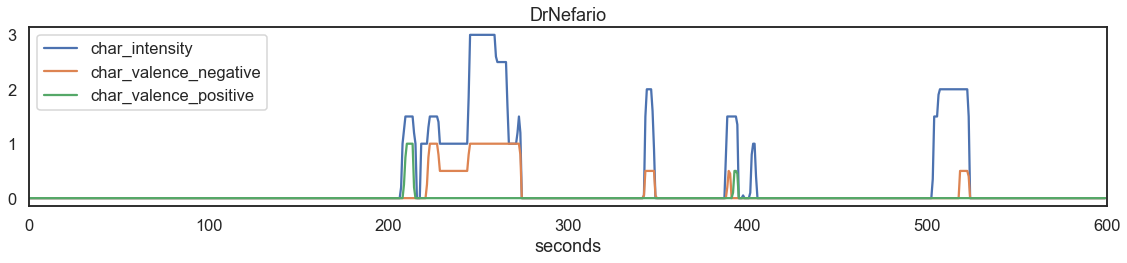

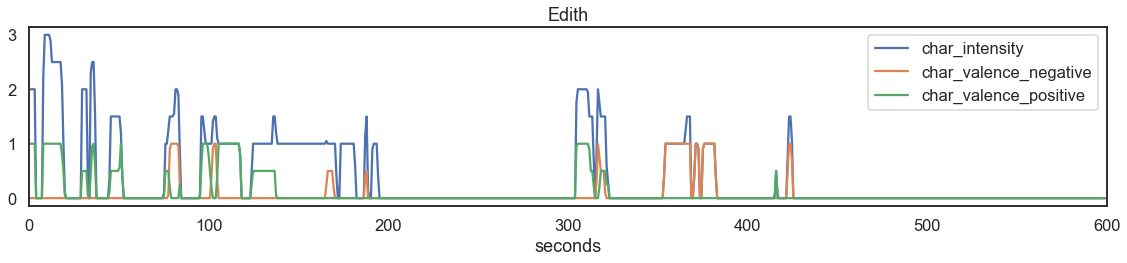

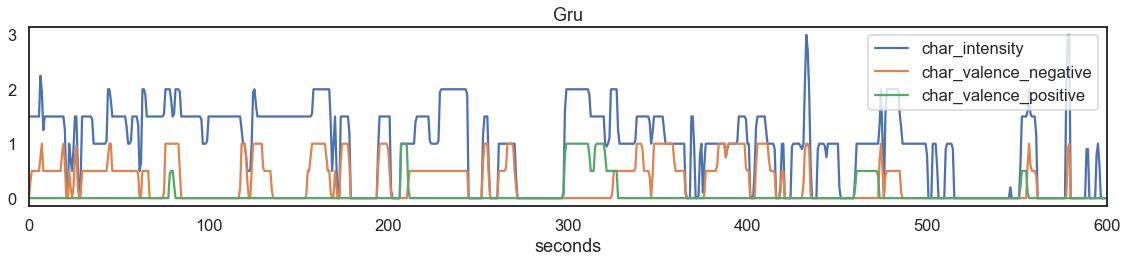

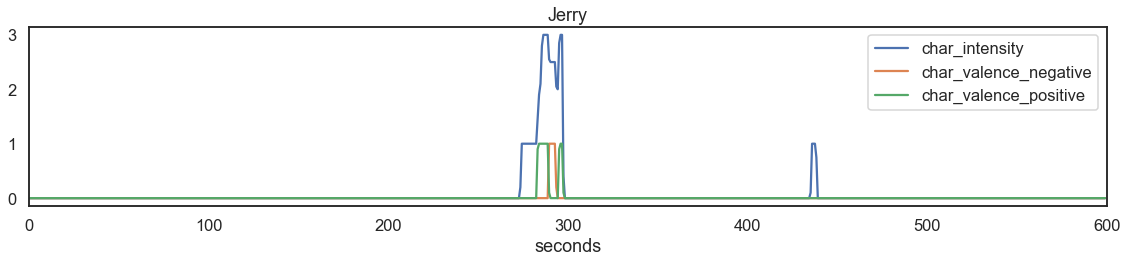

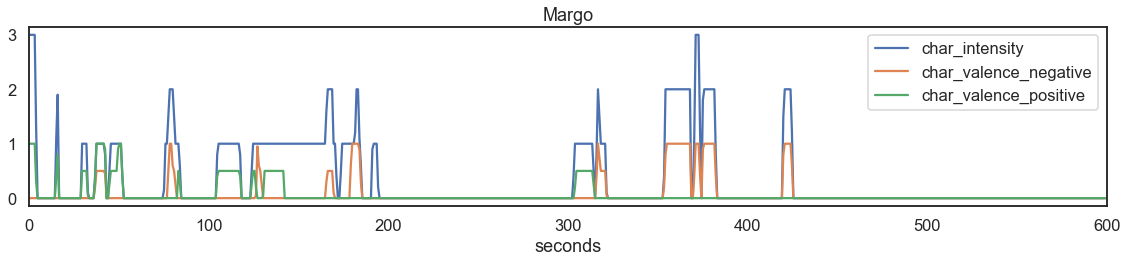

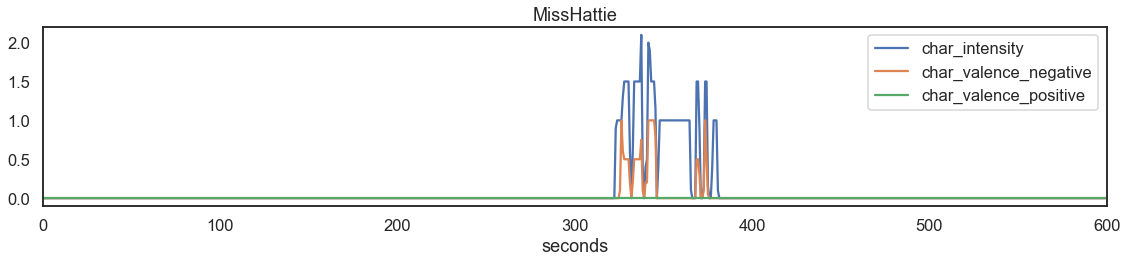

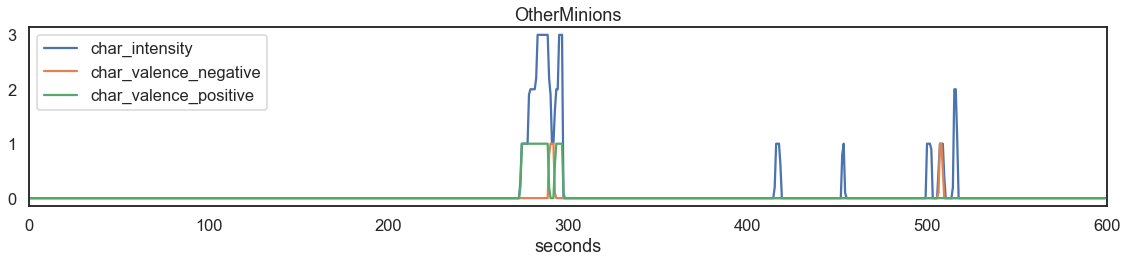

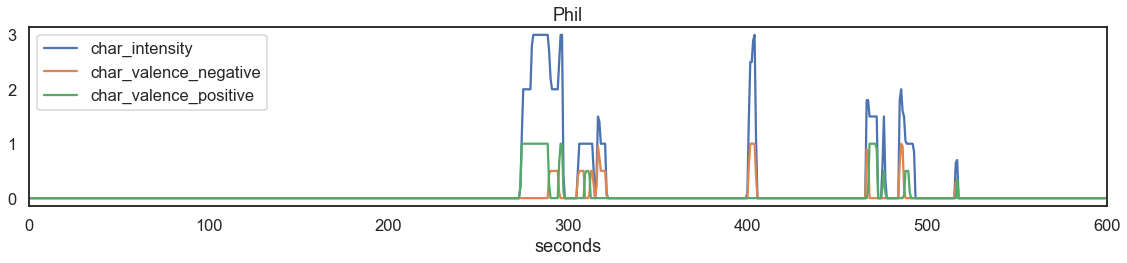

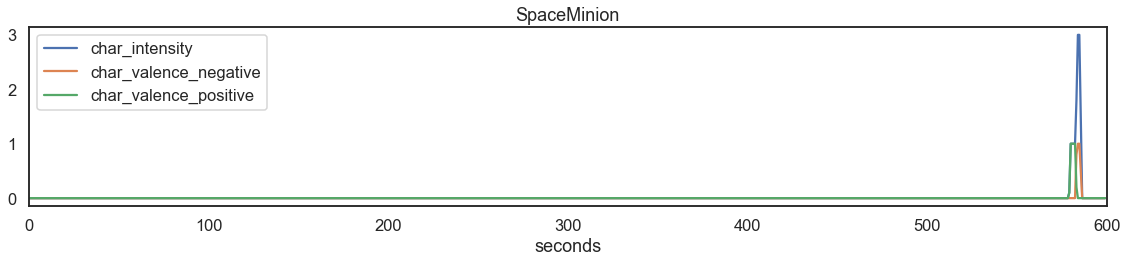

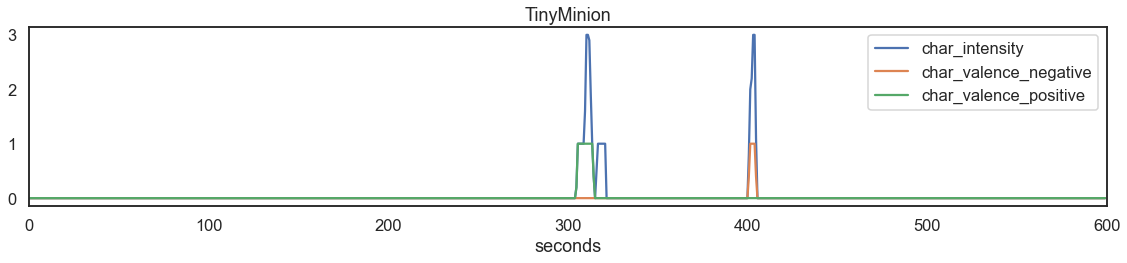

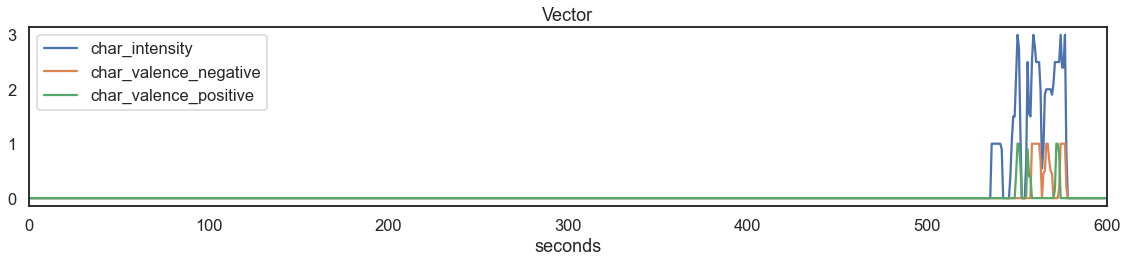

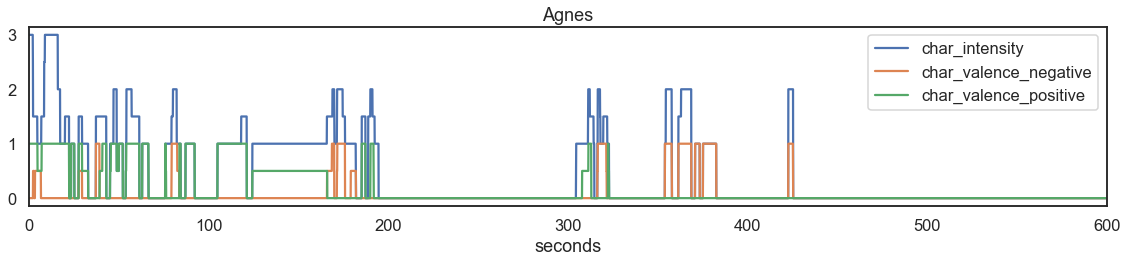

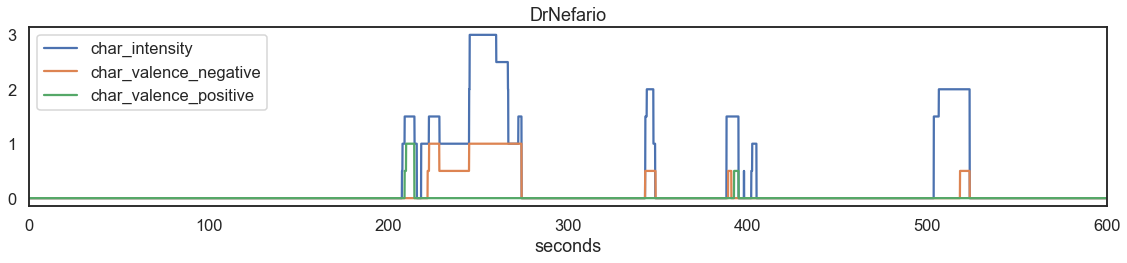

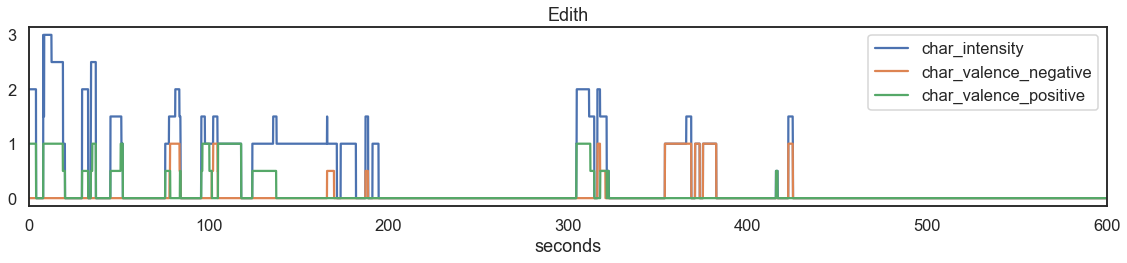

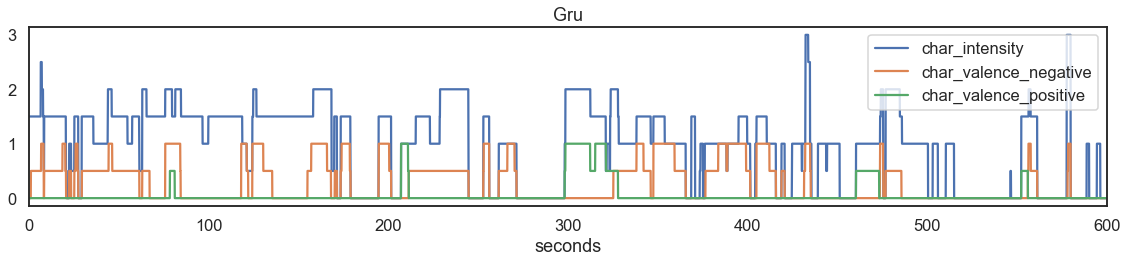

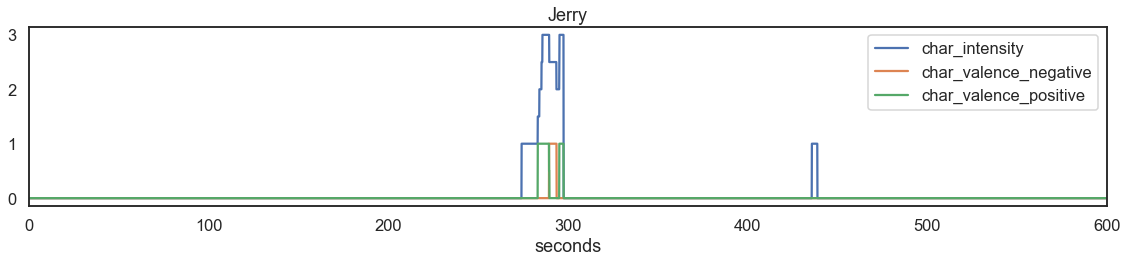

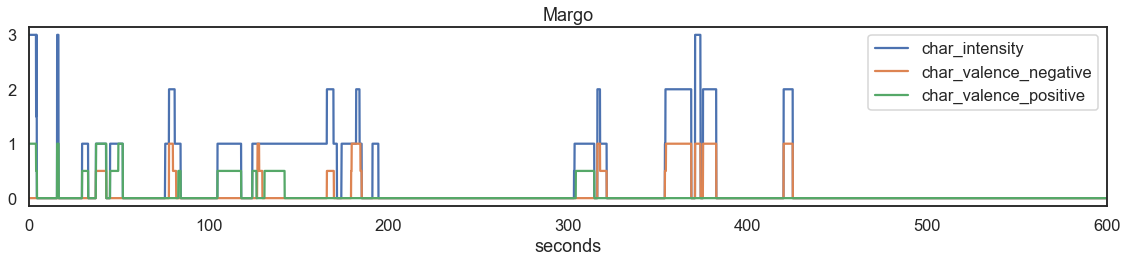

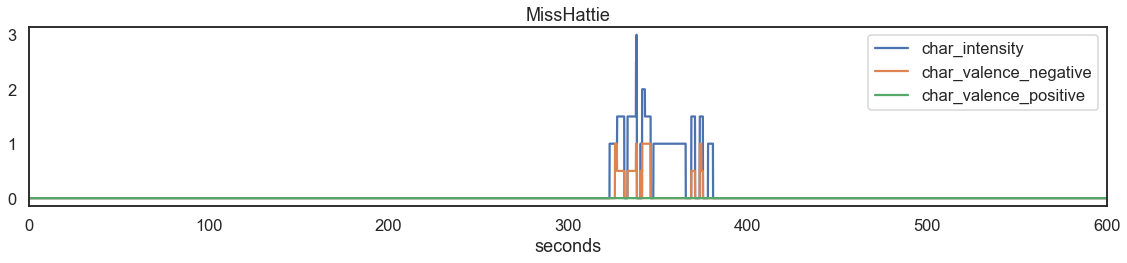

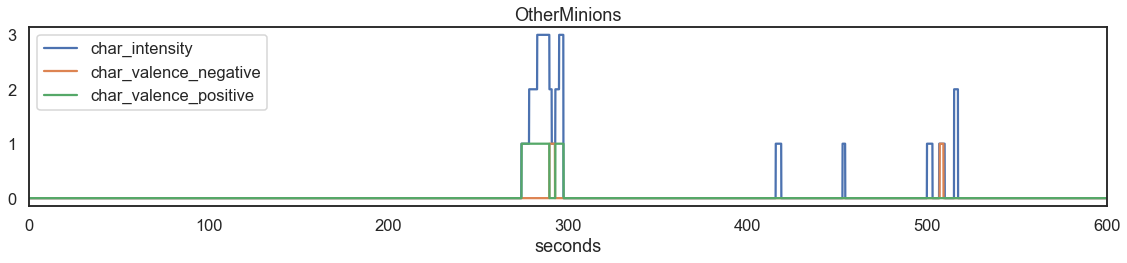

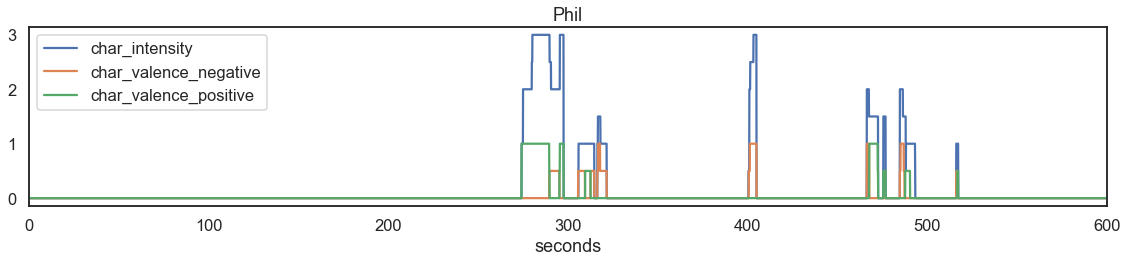

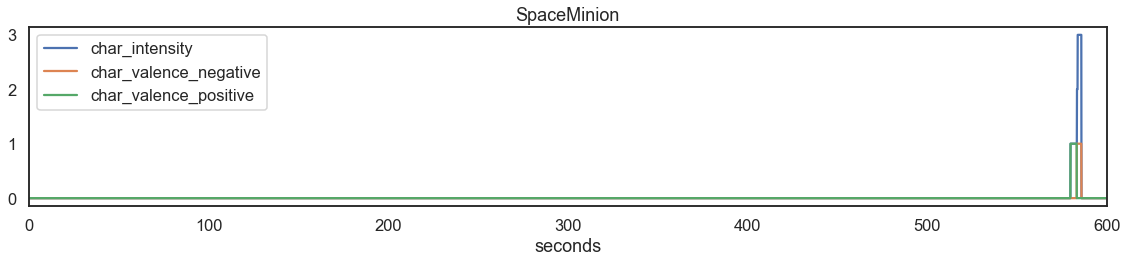

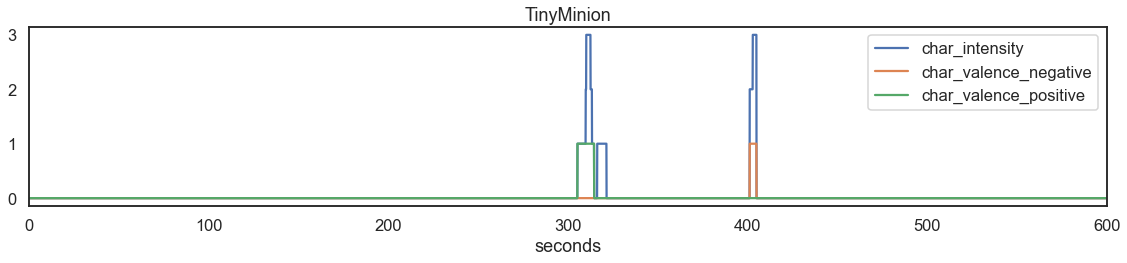

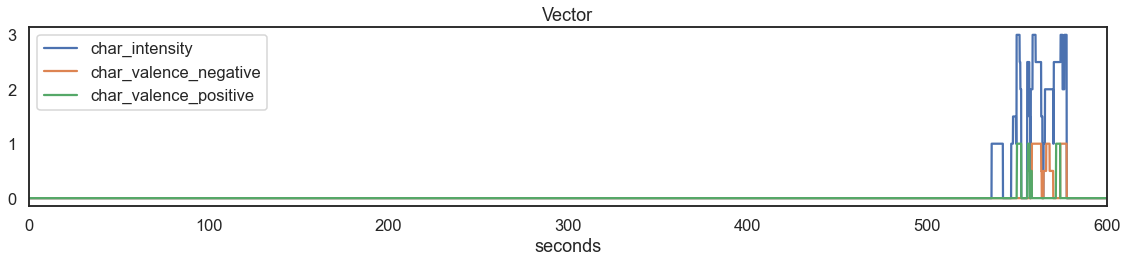

In [23]:
dfs = []
dfs10 = []
dm_sc = glob(proc_dir + 'DespicableMe*subjectivechar*')

# load character data
for file in dm_sc:
    char = file[132:-27]
    rater = file[-22:-20]
    temp = pd.read_csv(file, index_col=None)
    temp['char_neg_int'] = temp['char_valence_negative']*temp['char_intensity']
    temp['char_pos_int'] = temp['char_valence_positive']*temp['char_intensity']
    temp['char_anger'] = temp[['c_anger_face','c_anger_body','c_anger_verbal']].sum(axis=1)
    temp['char_anger_int'] = temp['char_anger']*temp['char_intensity']
    temp['char_happy'] = temp[['c_happy_face','c_happy_body','c_happy_verbal']].sum(axis=1)
    temp['char_happy_int'] = temp['char_happy']*temp['char_intensity']
    temp['char_fear'] = temp[['c_fear_face','c_fear_body','c_fear_verbal']].sum(axis=1)
    temp['char_fear_int'] = temp['char_fear']*temp['char_intensity']
    temp['char_sad'] = temp[['c_sad_face','c_sad_body','c_sad_verbal']].sum(axis=1)
    temp['char_sad_int'] = temp['char_sad']*temp['char_intensity']
    temp['char_excite'] = temp[['c_excite_face','c_excite_body','c_excite_verbal']].sum(axis=1)
    temp['char_excite_int'] = temp['char_excite']*temp['char_intensity']
    t = temp['onset_ms']/1000
    temp[temp['on_screen']==0] = 0 # for character codes only
    tind = np.arange(0,600800,800)/1000
    tind10 = np.arange(0,600100,100)/1000
    temp.index = pd.to_datetime(t,unit='s')
    temp.index.name = 'time'
    temp10 = temp
    temp = temp.resample('800ms').mean().round(1)
    temp['seconds']=tind
    temp.index = tind
    temp.index.name='time'
    temp['rater'] = rater
    temp['char_name'] = char
    temp10.index.name='time'
    temp10['seconds'] = tind10
    temp10['onset_ms'] = tind10*1000
    temp10['rater'] = rater
    temp10['char_name'] = char
    dfs.append(temp)
    dfs10.append(temp10)

dm_chardata = pd.concat(dfs)
dm_chardata10 = pd.concat(dfs10)

mean_char = []
# plot each set of subjective ratings
for title, char in dm_chardata.groupby('char_name'):
    t = char.groupby('time').mean()
    t.plot(y=['char_intensity','char_valence_negative','char_valence_positive'],
                               x='seconds',xlim=(0,600), title=title, figsize=(16,4))
    plt.tight_layout()
    #plt.savefig(fig_dir + 'DM_subjcodes_char_{0}.svg'.format(title))
    plt.show()
    plt.close()
    mean_char.append(t)

dm_chardata = pd.concat(mean_char)

mean_char10 = []
# plot each set of subjective ratings
for title, char in dm_chardata10.groupby('char_name'):
    t = char.groupby('time').mean()
    t.plot(y=['char_intensity','char_valence_negative','char_valence_positive'],
                               x='seconds',xlim=(0,600), title=title, figsize=(16,4))
    plt.tight_layout()
    #plt.savefig(fig_dir + 'DM_subjcodes_char_{0}.svg'.format(title))
    plt.show()
    plt.close()
    mean_char10.append(t)

dm_chardata10 = pd.concat(mean_char10)

In [27]:
# summarize data
dm_summary_data_sum = dm_chardata.groupby('seconds').sum()

# combine data and compute summary subjective scores
dm_summary_codes = dm_summary_data_sum[['char_valence_negative','char_valence_positive','char_intensity',
                                        'char_pos_int', 'char_neg_int','char_anger', 'char_anger_int',
                                        'char_happy', 'char_happy_int', 'char_fear', 'char_fear_int',
                                        'char_sad', 'char_sad_int', 'char_excite', 'char_excite_int']]

# combine with objective codes
dm_summary_codes[['closeup','has_body','has_faces','num_chars', 'speaking','whole_words',
                  'has_words']]=dm_objcodes[['closeup','has_body','has_faces','num_chars','speaking','whole_words','has_words']]

#dm_summary_codes.to_csv(sum_dir + 'DM_summary_codes.csv')

# summarize 10Hz data
dm_summary_data_sum10 = dm_chardata10.groupby('seconds').sum()

# combine data and compute summary subjective scores
dm_summary_codes10 = dm_summary_data_sum10[['char_valence_negative','char_valence_positive','char_intensity',
                                        'char_pos_int', 'char_neg_int','char_anger', 'char_anger_int',
                                        'char_happy', 'char_happy_int', 'char_fear', 'char_fear_int',
                                        'char_sad', 'char_sad_int', 'char_excite', 'char_excite_int']]

# combine with objective codes
dm_summary_codes10[['closeup','has_body','has_faces','num_chars', 'speaking','whole_words',
                  'has_words']]=dm_objcodes10hz[['closeup','has_body','has_faces','num_chars','speaking','whole_words','has_words']]

dm_summary_codes10.to_csv(sum_dir + 'DM_summary_codes10Hz.csv')

/Users/catcamacho/Library/Python/3.8/lib/python/site-packages/pandas/core/frame.py:3636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


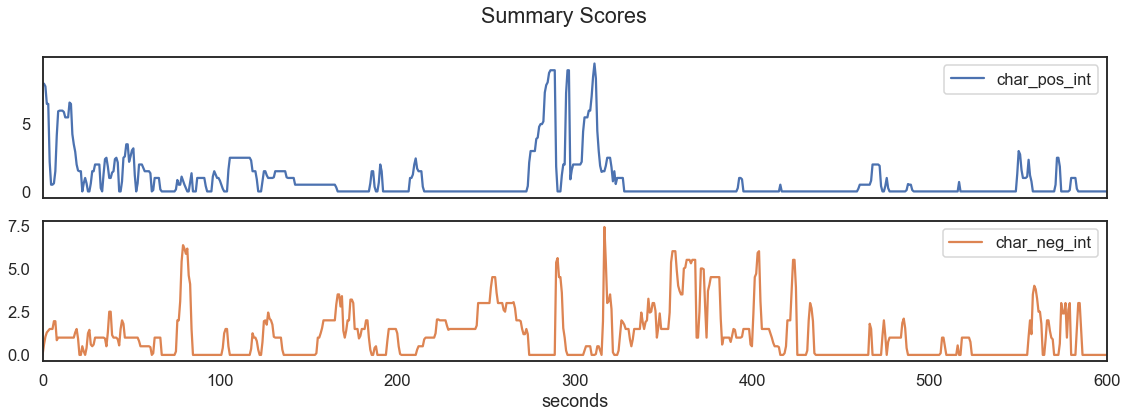

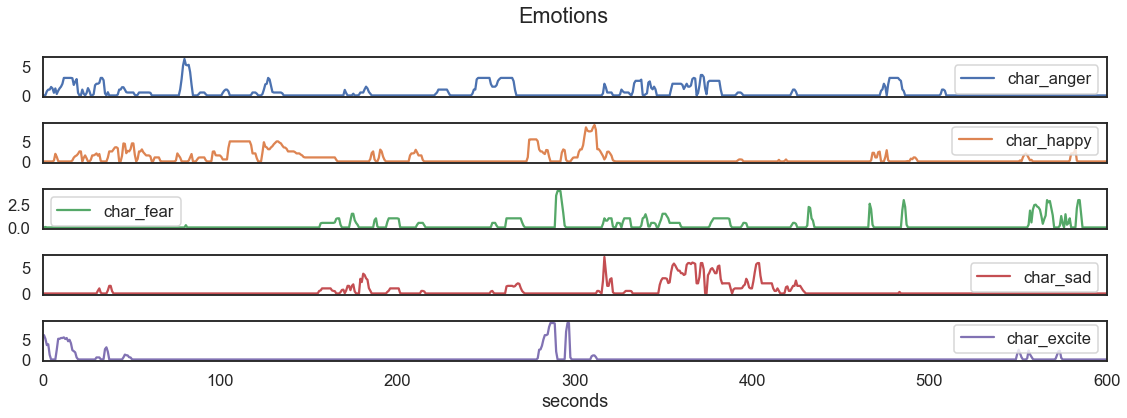

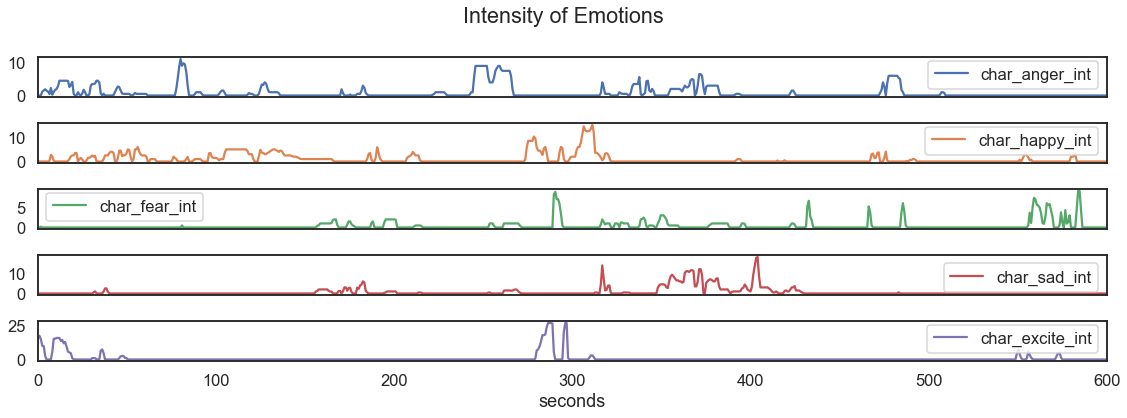

In [67]:
dm_summary_codes.plot(y=['char_pos_int','char_neg_int'], xlim=(0,600), title='Summary Scores', figsize=(16,6), subplots=True)
plt.tight_layout()
plt.savefig(fig_dir + 'DM_global_posneg_imca.svg')
plt.show()
plt.close()
dm_summary_codes.plot(y=['char_anger', 'char_happy', 'char_fear', 'char_sad',
                         'char_excite'], xlim=(0,600), title='Emotions', figsize=(16,6), subplots=True)
plt.tight_layout()
plt.savefig(fig_dir + 'DM_basic_emotions.svg')
plt.show()
plt.close()
dm_summary_codes.plot(y=['char_anger_int','char_happy_int','char_fear_int','char_sad_int', 
                         'char_excite_int'], xlim=(0,600), title='Intensity of Emotions', figsize=(16,6), subplots=True)
plt.tight_layout()
plt.savefig(fig_dir + 'DM_basic_emotions_intensity.svg')
plt.show()
plt.close()

### The Present

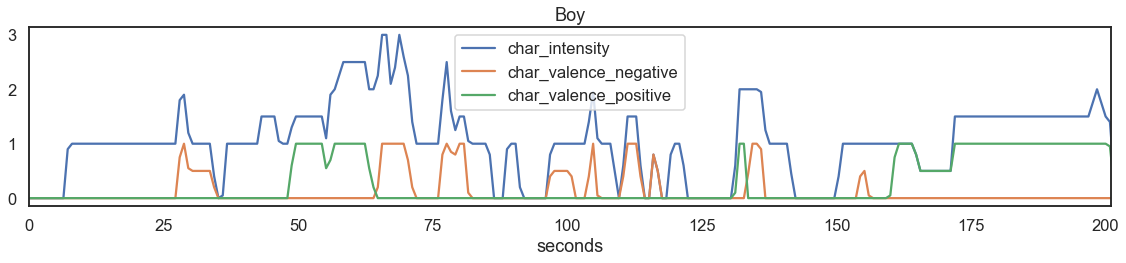

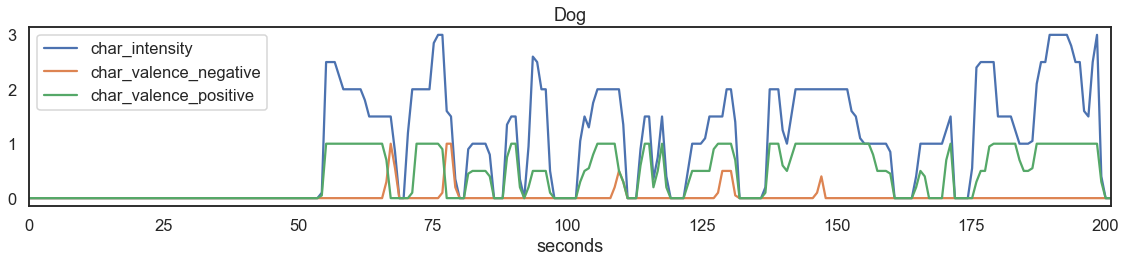

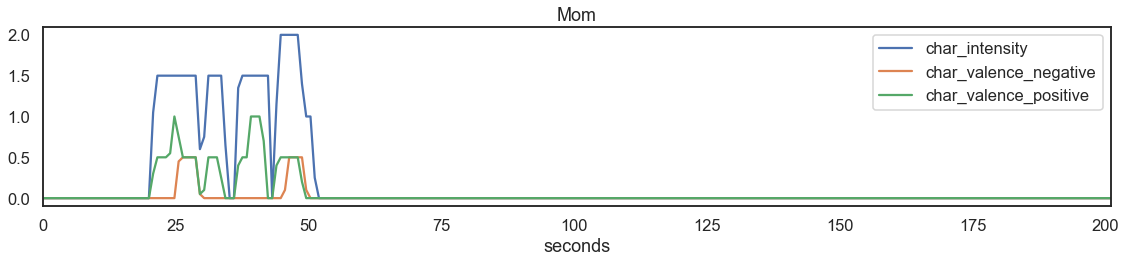

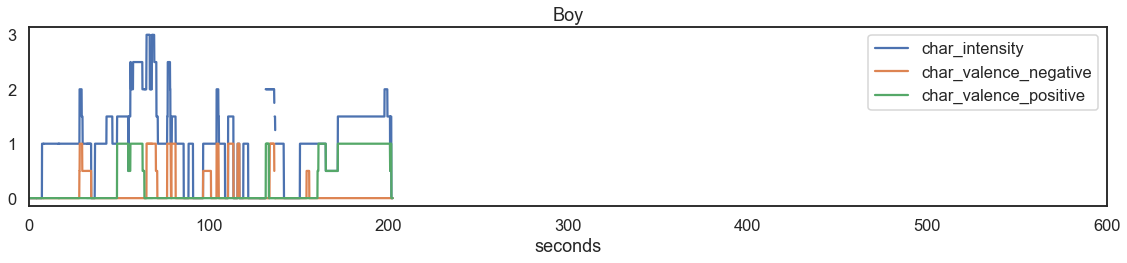

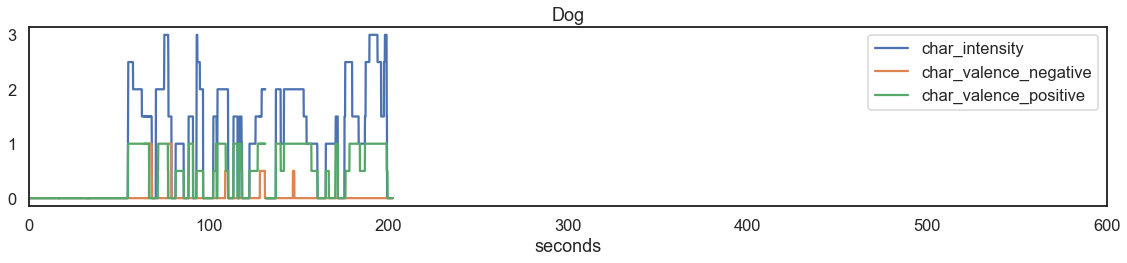

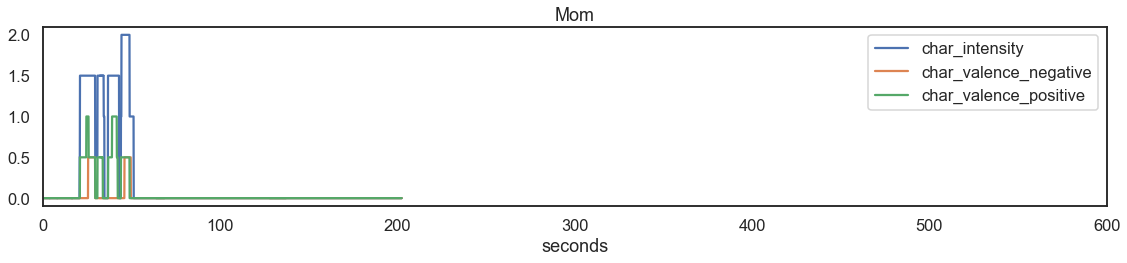

In [49]:
dfs = []
dfs10 = []
tp_sc = glob(proc_dir + 'ThePresent*subjectivechar*')

# load character data
for file in tp_sc:
    char = file[130:-27]
    rater = file[-22:-20]
    temp = pd.read_csv(file, index_col=None)
    temp['char_neg_int'] = temp['char_valence_negative']*temp['char_intensity']
    temp['char_pos_int'] = temp['char_valence_positive']*temp['char_intensity']
    temp['char_anger'] = temp[['c_anger_face','c_anger_body','c_anger_verbal']].sum(axis=1)
    temp['char_anger_int'] = temp['char_anger']*temp['char_intensity']
    temp['char_happy'] = temp[['c_happy_face','c_happy_body','c_happy_verbal']].sum(axis=1)
    temp['char_happy_int'] = temp['char_happy']*temp['char_intensity']
    temp['char_fear'] = temp[['c_fear_face','c_fear_body','c_fear_verbal']].sum(axis=1)
    temp['char_fear_int'] = temp['char_fear']*temp['char_intensity']
    temp['char_sad'] = temp[['c_sad_face','c_sad_body','c_sad_verbal']].sum(axis=1)
    temp['char_sad_int'] = temp['char_sad']*temp['char_intensity']
    temp['char_excite'] = temp[['c_excite_face','c_excite_body','c_excite_verbal']].sum(axis=1)
    temp['char_excite_int'] = temp['char_excite']*temp['char_intensity']
    t = temp['onset_ms']/1000
    temp[temp['on_screen']==0] = 0 # for character codes only
    tind = np.arange(0,203200,800)/1000
    tind10 = np.arange(0,202600,100)/1000
    temp.index = pd.to_datetime(t,unit='s')
    temp.index.name = 'time'
    temp10 = temp
    temp = temp.resample('800ms').mean().round(1)
    temp['seconds'] = tind
    temp.index = tind
    temp.index.name='time'
    temp['rater'] = rater
    temp['char_name'] = char
    temp10 = temp10.resample('100ms').mean().round(1)
    temp10['seconds'] = tind10
    temp10.index = tind10
    temp10.index.name='time'
    temp10['rater'] = rater
    temp10['char_name'] = char
    dfs10.append(temp10)
    dfs.append(temp)

tp_chardata = pd.concat(dfs)
tp_chardata10 = pd.concat(dfs10)
mean_char = []

# plot each set of subjective ratings
for title, char in tp_chardata.groupby('char_name'):
    t = char.groupby('time').mean()
    t.plot(y=['char_intensity','char_valence_negative','char_valence_positive'],
                               x='seconds',xlim=(0,201), title=title, figsize=(16,4))
    plt.tight_layout()
    #plt.savefig(fig_dir + 'TP_subjcodes_char_{0}.svg'.format(title))
    plt.show()
    plt.close()    
    mean_char.append(t)
    
tp_chardata = pd.concat(mean_char)

mean_char10 = []
# plot each set of subjective ratings
for title, char in tp_chardata10.groupby('char_name'):
    t = char.groupby('time').mean()
    t.plot(y=['char_intensity','char_valence_negative','char_valence_positive'],
                               x='seconds',xlim=(0,600), title=title, figsize=(16,4))
    plt.tight_layout()
    #plt.savefig(fig_dir + 'DM_subjcodes_char_{0}.svg'.format(title))
    plt.show()
    plt.close()
    mean_char10.append(t)

tp_chardata10 = pd.concat(mean_char10)

In [51]:
# summarize data
tp_summary_data_sum = tp_chardata.groupby('seconds').sum()

# combine data and compute summary subjective scores
tp_summary_codes = tp_summary_data_sum[['char_valence_negative','char_valence_positive','char_intensity',
                                        'char_pos_int', 'char_neg_int','char_anger', 'char_anger_int',
                                        'char_happy', 'char_happy_int', 'char_fear', 'char_fear_int',
                                        'char_sad', 'char_sad_int', 'char_excite', 'char_excite_int']]

# combine with objective codes
tp_summary_codes[['closeup','has_body','has_faces','num_chars', 'speaking','whole_words',
                  'has_words']]=tp_objcodes[['closeup','has_body','has_faces','num_chars', 'speaking','whole_words','has_words']]

tp_summary_codes.to_csv(sum_dir + 'TP_summary_codes.csv')

# summarize data
tp_summary_data_sum10 = tp_chardata10.groupby('seconds').sum()

# combine data and compute summary subjective scores
tp_summary_codes10 = tp_summary_data_sum10[['char_valence_negative','char_valence_positive','char_intensity',
                                        'char_pos_int', 'char_neg_int','char_anger', 'char_anger_int',
                                        'char_happy', 'char_happy_int', 'char_fear', 'char_fear_int',
                                        'char_sad', 'char_sad_int', 'char_excite', 'char_excite_int']]

# combine with objective codes
tp_summary_codes10[['closeup','has_body','has_faces','num_chars', 'speaking','whole_words',
                  'has_words']]=tp_objcodes10hz[['closeup','has_body','has_faces','num_chars', 'speaking','whole_words','has_words']]

tp_summary_codes10.to_csv(sum_dir + 'TP_summary_10Hz_codes.csv')

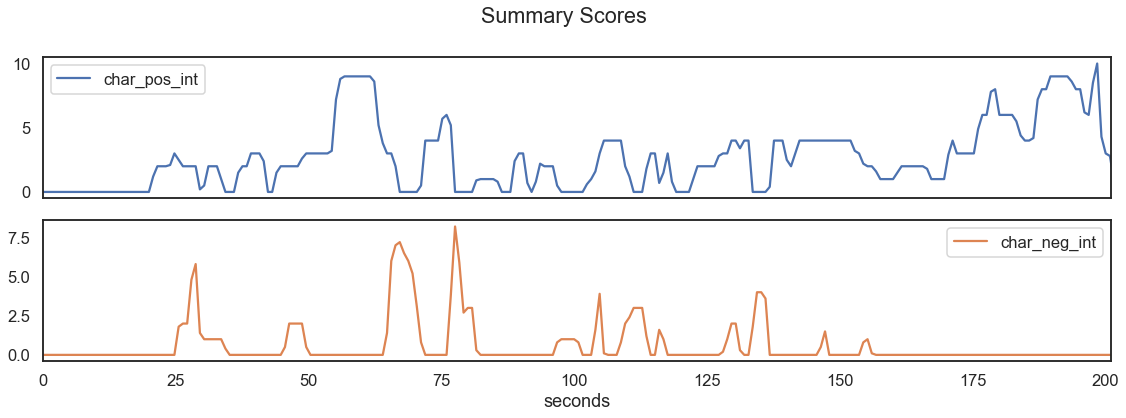

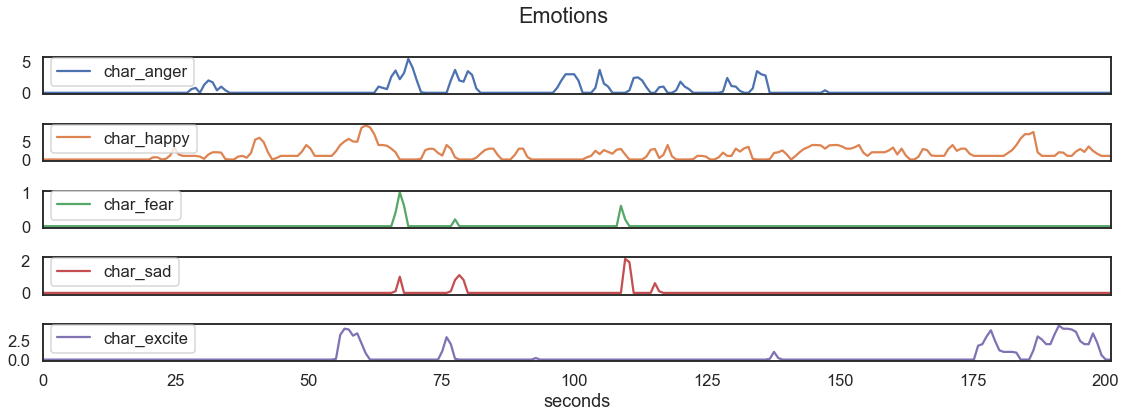

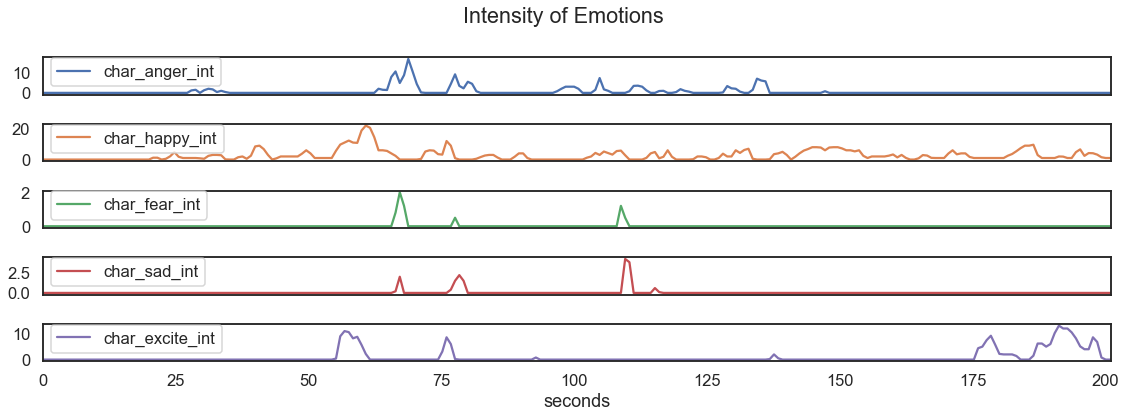

In [72]:
tp_summary_codes.plot(y=['char_pos_int','char_neg_int'], xlim=(0,201), title='Summary Scores', figsize=(16,6), subplots=True)
plt.tight_layout()
plt.savefig(fig_dir + 'TP_global_posneg_imca.svg')
plt.show()
plt.close()
tp_summary_codes.plot(y=['char_anger', 'char_happy', 'char_fear', 'char_sad',
                         'char_excite'], xlim=(0,201), title='Emotions', figsize=(16,6), subplots=True)
plt.tight_layout()
plt.savefig(fig_dir + 'TP_basic_emotions.svg')
plt.show()
plt.close()
tp_summary_codes.plot(y=['char_anger_int','char_happy_int','char_fear_int','char_sad_int', 
                         'char_excite_int'], xlim=(0,201), title='Intensity of Emotions', figsize=(16,6), subplots=True)
plt.tight_layout()
plt.savefig(fig_dir + 'TP_basic_emotions_intensity.svg')
plt.show()
plt.close()

# Prepare low-level/automated video features

### Despicable Me

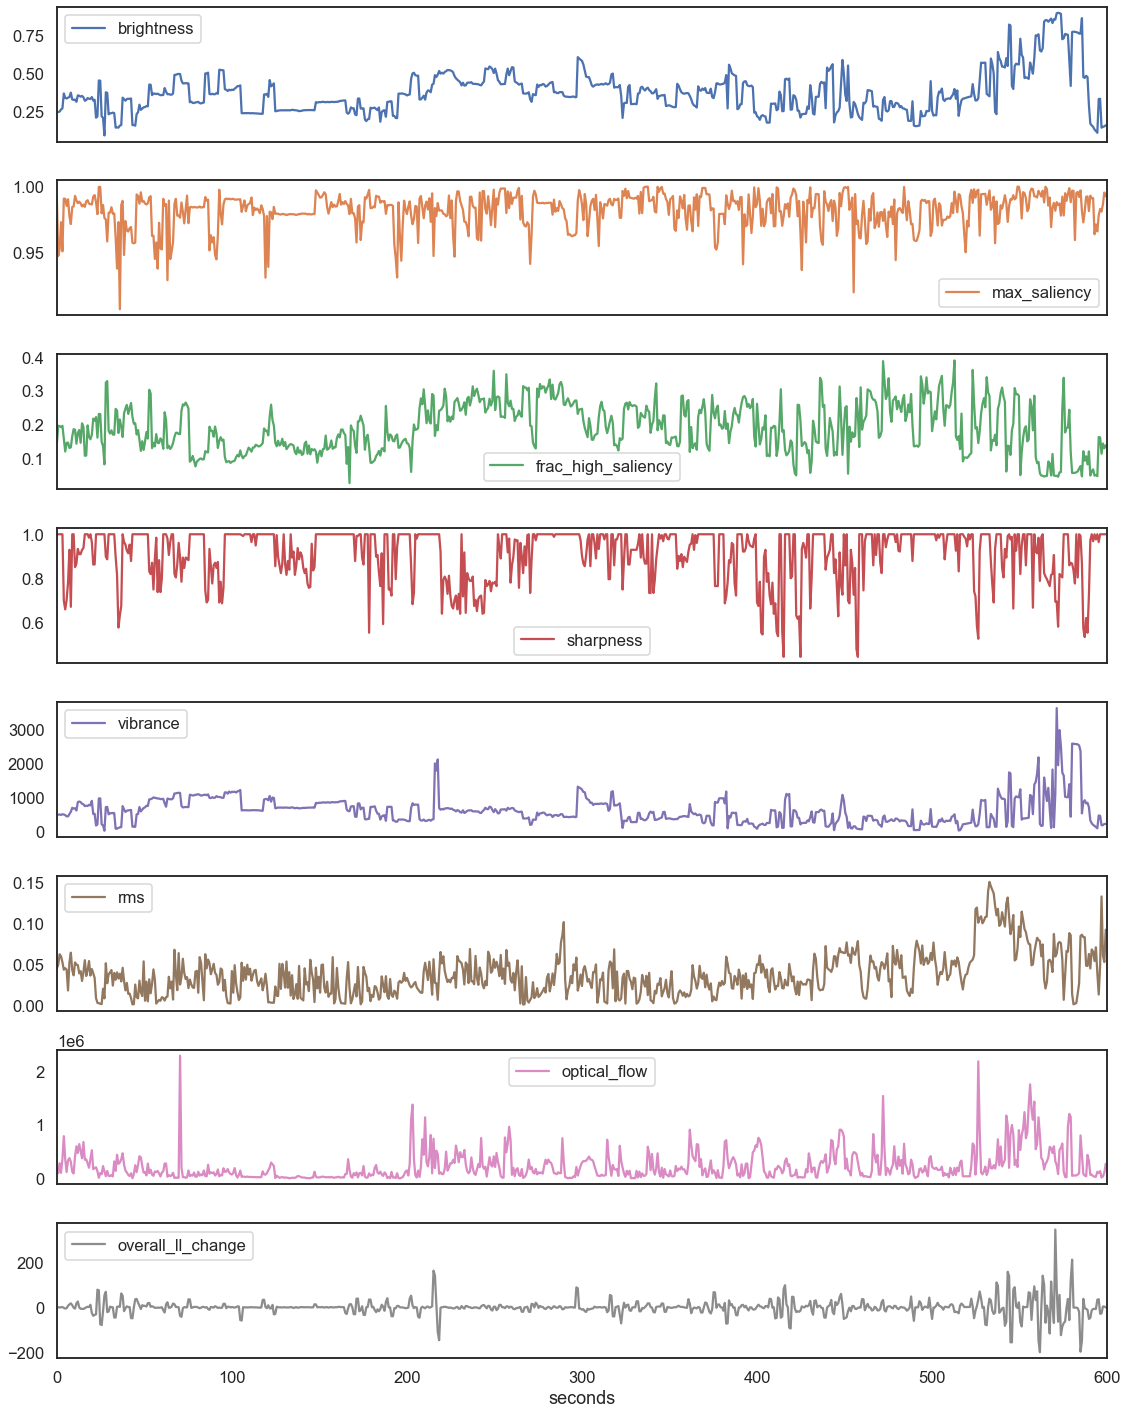

In [41]:
# load other low level feature data, add in optical flow
dm_llsv = pd.read_csv(ll_dir + 'movieDM_low_av_features.csv', index_col=0)
dm_llsv.index = np.arange(0,600000,800)/1000
dm_llsv.index.name = 'seconds'


# compute overall change 
dm_llsv['overall_ll_change'] = np.gradient(dm_llsv[['brightness','frac_high_saliency', 'sharpness', 'vibrance','rms']].to_numpy(), 
                                        axis=0).mean(axis=1)

dm_llsv.plot(y=['brightness', 'max_saliency','frac_high_saliency', 'sharpness', 'vibrance', 
             'rms','optical_flow','overall_ll_change'], figsize=(16,20),xlim=(0,600),subplots=True)
plt.tight_layout()
plt.savefig(fig_dir + 'DM_lowlevel_features.svg')

dm_summary=dm_summary_codes.merge(dm_llsv, left_index=True, right_index=True)
dm_summary.to_csv(sum_dir + 'DM_summary_codes.csv')

### The Present

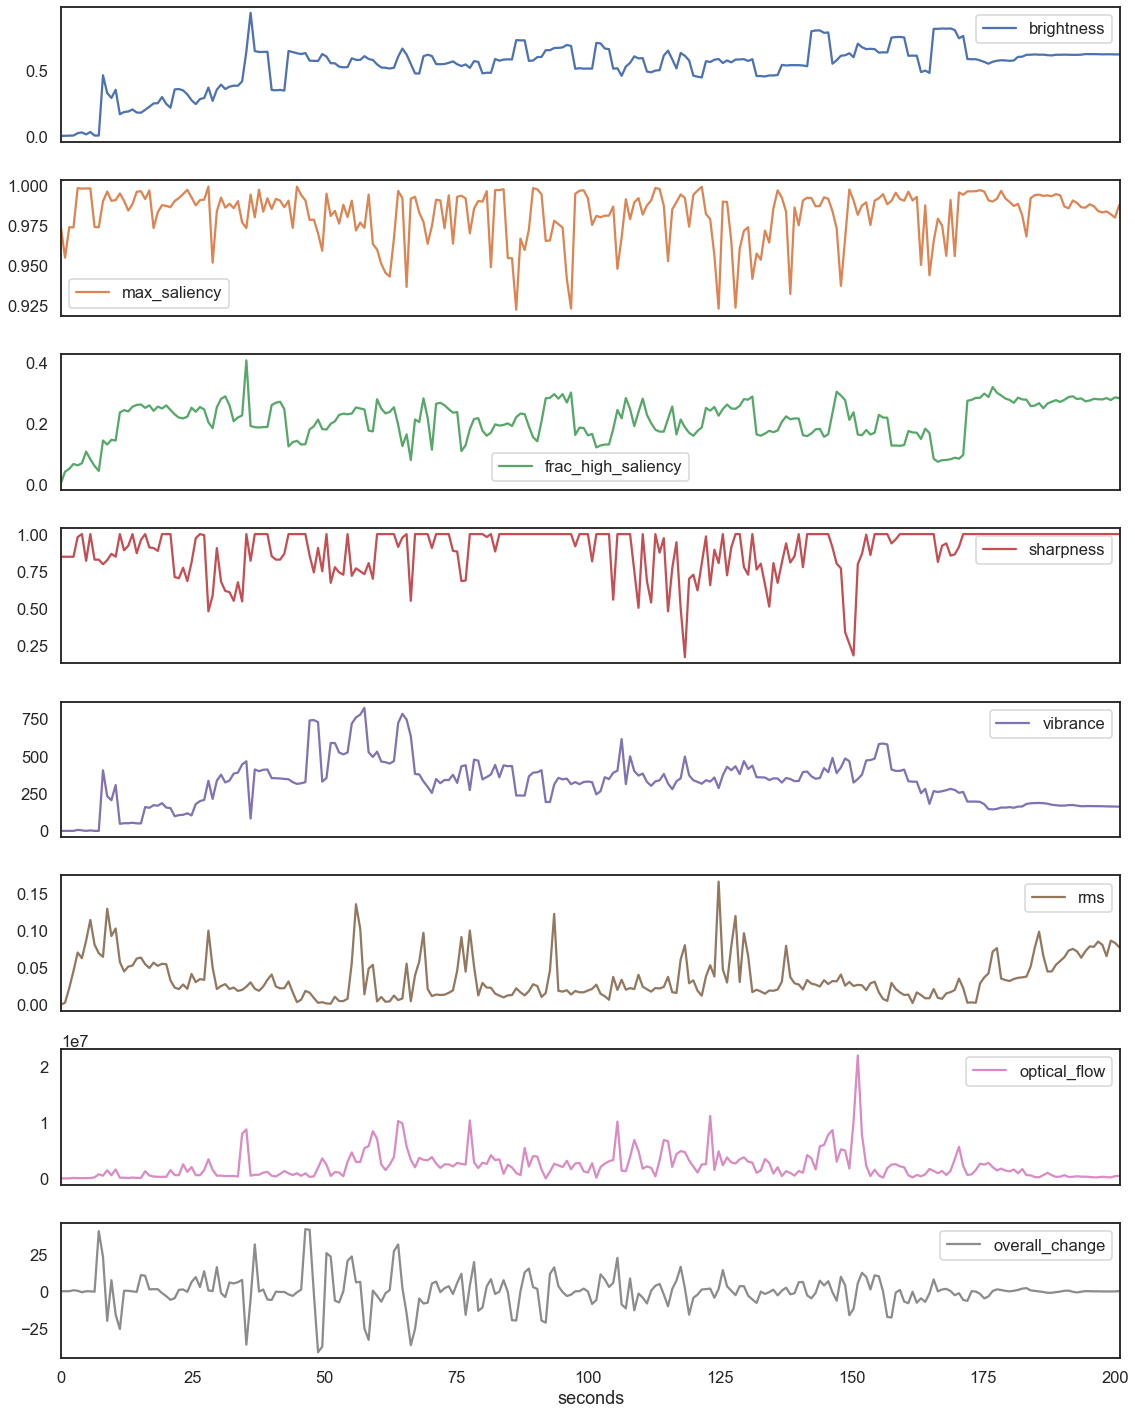

In [48]:
# load other low level feature data, add in optical flow
tp_llsv = pd.read_csv(ll_dir + 'movieTP_low_av_features.csv', index_col=0)
tp_llsv.index = np.arange(0,203000,800)/1000
tp_llsv.index.name = 'seconds'

# compute overall change 
tp_llsv['overall_change'] = np.gradient(tp_llsv[['brightness','frac_high_saliency', 'sharpness', 'vibrance','rms']].to_numpy(), 
                                        axis=0).mean(axis=1)

tp_llsv.plot(y=['brightness', 'max_saliency','frac_high_saliency', 'sharpness', 'vibrance', 
             'rms','optical_flow','overall_change'], figsize=(16,20),xlim=(0,201),subplots=True)
plt.tight_layout()
plt.savefig(fig_dir + 'TP_lowlevel_features.svg')

tp_summary_codes=tp_summary_codes.merge(tp_llsv, left_index=True, right_index=True)
tp_summary_codes.to_csv(sum_dir + 'TP_summary_codes.csv')